In [60]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [61]:
#from google.colab import files
#uploaded = files.upload()

In [62]:
#data
df=pd.read_csv('train.csv')

In [63]:
pd.DataFrame(df.groupby('sentiment').size().rename('counts')).sort_values('counts', ascending=False)

,counts
sentiment,
1,8530
2,3640
0,2353
-1,1296


In [64]:
df.shape

(15819, 3)

In [65]:
equiv = {-1:'Negative', 0:'Neutral', 1:"Positive", 2:'Fact'}
df['sentiment'] = df['sentiment'].map(equiv)
df.head()

,sentiment,message,tweetid
0,Positive,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Positive,It's not like we lack evidence of anthropogeni...,126103
2,Fact,RT @RawStory: Researchers say we have three ye...,698562
3,Positive,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Positive,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [66]:
import numpy as np
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.9]
test = df[df['random_number'] > 0.9]

In [67]:
df.index

RangeIndex(start=0, stop=15819, step=1)

In [68]:
import random
from sklearn.model_selection import train_test_split
#1000 random sample rows for each author
df_new=pd.DataFrame()
twts_train=pd.DataFrame()
twts_test=pd.DataFrame()
sentiment_train=pd.DataFrame()
sentiment_test=pd.DataFrame()
#for s in df.sentiment.unique():
    #rows = random.sample(list(df[df['sentiment']==s].index), 1000)
    #rows = random.sample(list(df.index), 15819)
rows = df.index
df_temp = df.loc[rows]
df_new=df_new.append(df_temp,ignore_index=True)    
X_train, X_test, Y_train, Y_test = train_test_split(df_temp.loc[:,['message']], df_temp.loc[:,['sentiment']], test_size=0.1, shuffle=True, random_state=42)
twts_train=twts_train.append(X_train, verify_integrity=False)
twts_test=twts_test.append(X_test, verify_integrity=False)
sentiment_train=sentiment_train.append(Y_train, verify_integrity=False)
sentiment_test=sentiment_test.append(Y_test, verify_integrity=False)
    

In [69]:
"""
import random
from sklearn.model_selection import train_test_split
#1000 random sample rows for each author
df_new=pd.DataFrame()
twts_train=pd.DataFrame()
twts_test=pd.DataFrame()
author_train=pd.DataFrame()
author_test=pd.DataFrame()
for a in df.author.unique():
    rows = random.sample(list(df[df['author']==a].index), 1000)
    df_temp = df.ix[rows]
    df_new=df_new.append(df_temp,ignore_index=True)    
    X_train, X_test, Y_train, Y_test = train_test_split(df_temp.ix[:,['text']], df_temp.ix[:,['author']], test_size=0.2, random_state=42)
    twts_train=twts_train.append(X_train, verify_integrity=False)
    twts_test=twts_test.append(X_test, verify_integrity=False)
    author_train=author_train.append(Y_train, verify_integrity=False)
    author_test=author_test.append(Y_test, verify_integrity=False)
   """ 

"\nimport random\nfrom sklearn.model_selection import train_test_split\n#1000 random sample rows for each author\ndf_new=pd.DataFrame()\ntwts_train=pd.DataFrame()\ntwts_test=pd.DataFrame()\nauthor_train=pd.DataFrame()\nauthor_test=pd.DataFrame()\nfor a in df.author.unique():\n    rows = random.sample(list(df[df['author']==a].index), 1000)\n    df_temp = df.ix[rows]\n    df_new=df_new.append(df_temp,ignore_index=True)    \n    X_train, X_test, Y_train, Y_test = train_test_split(df_temp.ix[:,['text']], df_temp.ix[:,['author']], test_size=0.2, random_state=42)\n    twts_train=twts_train.append(X_train, verify_integrity=False)\n    twts_test=twts_test.append(X_test, verify_integrity=False)\n    author_train=author_train.append(Y_train, verify_integrity=False)\n    author_test=author_test.append(Y_test, verify_integrity=False)\n   "

In [70]:
#X_train, X_test, Y_train, Y_test = train_test_split(train['message'], train['sentiment'], test_size=0.2, random_state=42)

In [71]:
#X_train, X_test, Y_train, Y_test = train_test_split(train['message'], train['sentiment'], test_size=0.2, shuffle=True, stratify=train['sentiment'], random_state=42)

In [72]:
"""
twts_train=twts_train.append(X_train, verify_integrity=False)
twts_test=twts_test.append(X_test, verify_integrity=False)
sentiment_train=sentiment_train.append(Y_train, verify_integrity=False)
sentiment_test=sentiment_test.append(Y_test, verify_integrity=False)
"""

'\ntwts_train=twts_train.append(X_train, verify_integrity=False)\ntwts_test=twts_test.append(X_test, verify_integrity=False)\nsentiment_train=sentiment_train.append(Y_train, verify_integrity=False)\nsentiment_test=sentiment_test.append(Y_test, verify_integrity=False)\n'

In [73]:
print (len(twts_train),len(sentiment_train))

14237 14237


In [74]:
print(len(twts_test),len(sentiment_test))

1582 1582


In [75]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Tokenizes and removes punctuation
    3. Stems
    4. Returns a list of the cleaned text
    """

    # tokenizing
    tokenizer = RegexpTokenizer(r'\w+')
    text_processed=tokenizer.tokenize(text)
    
    
    # stemming
    porter_stemmer = PorterStemmer()
    
    text_processed = [porter_stemmer.stem(word) for word in text_processed]
    

    return text_processed

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [77]:
ScoreSummaryByModel = list()

In [78]:
"""
def PredictionEvaluation(author_test_b,author_predicted_b,target_names,comment):
    Accuracy=accuracy_score(author_test_b,author_predicted_b)
    #print (Accuracy)
    Recall=recall_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')
    #print (Recall)
    Precision=precision_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')
    #print (Precision)
    F1=f1_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')
    #print (F1)
    ScoreSummaryByModel.append([Accuracy,Recall,Precision,F1,comment])
    print(classification_report(author_test_b, author_predicted_b, target_names=target_names))
    """

"\ndef PredictionEvaluation(author_test_b,author_predicted_b,target_names,comment):\n    Accuracy=accuracy_score(author_test_b,author_predicted_b)\n    #print (Accuracy)\n    Recall=recall_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')\n    #print (Recall)\n    Precision=precision_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')\n    #print (Precision)\n    F1=f1_score(author_test_b, author_predicted_b, labels=[0,1,2,3], average='macro')\n    #print (F1)\n    ScoreSummaryByModel.append([Accuracy,Recall,Precision,F1,comment])\n    print(classification_report(author_test_b, author_predicted_b, target_names=target_names))\n    "

In [79]:
def PredictionEvaluation(sentiment_test_b,sentiment_predicted_b,target_names,comment):
    Accuracy=accuracy_score(sentiment_test_b,sentiment_predicted_b)
    #print (Accuracy)
    Recall=recall_score(sentiment_test_b, sentiment_predicted_b, labels=[0,1,2,3], average='macro')
    #print (Recall)
    Precision=precision_score(sentiment_test_b, sentiment_predicted_b, labels=[0,1,2,3], average='macro')
    #print (Precision)
    F1=f1_score(sentiment_test_b, sentiment_predicted_b, labels=[0,1,2,3], average='macro')
    #print (F1)
    ScoreSummaryByModel.append([Accuracy,Recall,Precision,F1,comment])
    print(classification_report(sentiment_test_b, sentiment_predicted_b, target_names=target_names))

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [81]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
ScoreSummaryByModelParams=list()

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer

In [84]:
def ModelParamsEvaluation (f_union,model,params,comment):
    pipeline = Pipeline([
    # Extract the text & text_coded
    # Use FeatureUnion to combine the features from different vectorizers
    ('union', f_union),
    # Use a  classifier on the combined features
    ('clf', model)
    ])
    #grid_search = GridSearchCV(estimator=pipeline, param_grid=params, verbose=1)
    grid_search = GridSearchCV(estimator=pipeline, param_grid=params, verbose=1, refit=True, n_jobs=-1, cv=5)
    grid_search.fit(twts_train['message'], sentiment_train['sentiment'])
    sentiment_predicted = grid_search.predict(twts_test['message'])
    lb = LabelBinarizer()
    sentiment_test_b = lb.fit_transform(sentiment_test['sentiment'])
    sentiment_predicted_b  = lb.fit_transform(sentiment_predicted)
    #best score
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    sentiment_names=grid_search.best_estimator_.named_steps['clf'].classes_

    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        ScoreSummaryByModelParams.append([comment,grid_search.best_score_,"\t%s: %r" % (param_name, best_parameters[param_name])]) 
    return (sentiment_predicted,sentiment_predicted_b,sentiment_test_b,sentiment_names)

In [85]:
f2_union=FeatureUnion(
        transformer_list=[
            # Pipeline for pulling char features  from the text
            ('char', Pipeline([
                ('tfidf',     TfidfVectorizer(analyzer='char',ngram_range=(4, 4))),
            ])),
            # Pipeline for pulling stememd word features from the text
            ('text', Pipeline([
                ('tfidf',    TfidfVectorizer(analyzer='word',tokenizer= text_process,ngram_range=(1, 2))),
            ])),        

        ],

    )

In [86]:
from sklearn.svm import LinearSVC
#LinearSVC
p = {'clf__C': (0.99,0.97,0.95,0.93,0.91),
    'clf__class_weight': [None]}
(sentiment_predicted,sentiment_predicted_b, sentiment_test_b,sentiment_names)=ModelParamsEvaluation(f2_union,LinearSVC(),p,'LinearSVC')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min finished


Best score: 0.767
Best parameters set:
	clf__C: 0.93
	clf__class_weight: None


In [87]:
PredictionEvaluation(sentiment_predicted_b, sentiment_test_b,sentiment_names,'LinearSVC')

              precision    recall  f1-score   support

        Fact       0.85      0.77      0.81       375
    Negative       0.51      0.74      0.60        87
     Neutral       0.42      0.73      0.54       131
    Positive       0.89      0.81      0.85       989

   micro avg       0.79      0.79      0.79      1582
   macro avg       0.67      0.76      0.70      1582
weighted avg       0.83      0.79      0.80      1582
 samples avg       0.79      0.79      0.79      1582



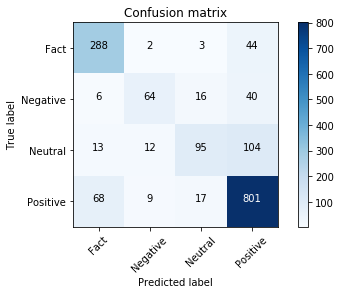

In [88]:
plot_confusion_matrix(confusion_matrix(sentiment_test['sentiment'], sentiment_predicted), sentiment_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [89]:
test_df=pd.read_csv('test.csv')
pl_svc1 = Pipeline([
        ('union', f2_union),
        ('clf', LinearSVC(C=0.93, class_weight=None))
    ])
pl_svc1.fit(twts_train['message'], sentiment_train['sentiment'])
predictions_val = pl_svc1.predict(twts_test['message'])
f1_score(sentiment_test['sentiment'], predictions_val, average="macro")

0.698864367531077

In [90]:
predictions_test = pl_svc1.predict(test_df['message'])
#df=pd.read_csv('test.csv')
predictions_test = pl_svc1.predict(test_df['message'])
test_df['sentiment'] = predictions_test
test_df

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,Positive
1,Combine this with the polling of staffers re c...,35326,Positive
2,"The scary, unimpeachable evidence that climate...",224985,Positive
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,Positive
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,Neutral
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,Positive
10542,2016: the year climate change came home: Durin...,875167,Positive
10543,RT @loop_vanuatu: Pacific countries positive a...,78329,Fact
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455,Neutral


In [91]:
equiv = {'Negative':-1, 'Neutral':0, "Positive":1, 'Fact':2}
test_df['sentiment'] = test_df['sentiment'].map(equiv)
test_df.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,1
1,Combine this with the polling of staffers re c...,35326,1
2,"The scary, unimpeachable evidence that climate...",224985,1
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,1
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,0


In [92]:
test_df[['tweetid','sentiment']].to_csv('testsubmission125.csv', index=False)